## Smoothing

Smoothing can help to discover trends that otherwise might be hard to see in raw data. 


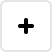
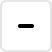
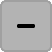
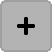
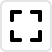
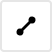
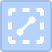

In [10]:
import pandas as pd

from lets_plot import *
load_lets_plot_js()

Let's use *geom_smooth* to see how a car MPG depends on the engine displacement.

In [11]:
mpg_df = pd.read_csv('https://jetbrains.bintray.com/lets-plot/mpg.csv')
mpg_plot = ggplot(mpg_df, aes(x='displ', y='hwy'))
mpg_plot + geom_point() + geom_smooth()

### LOESS model does seem to better fit MPG data than linear model.

In [12]:
mpg_plot + geom_point() + geom_smooth(method='loess', size=1, se=False)

In [13]:
# Assign the color of points to `drivetrain type` variable (drv).
# This makes it easy to see that points with the same type of drivetrain form clusters. 
mpg_plot + geom_point(aes(color='drv'), size=10, alpha=.3) + geom_smooth(method='loess', size=1, se=False)

### Group data-points by drivetrain type and apply smooth statistic to each group independently.

In [14]:
mpg_plot + geom_point(aes(color='drv')) \
+ geom_smooth(aes(color='drv'), method='loess', size=1)

### Return to the linear model after all.

In [15]:
mpg_plot + geom_point(aes(color='drv')) \
+ geom_smooth(aes(color='drv'), method='lm', size=1)

## Effect of `span` parameter on the "wiggliness" the LOESS smoother.

The span is the fraction of points used to fit each local regression.
Small numbers make a wigglier curve, larger numbers make a smoother curve.

In [16]:
import math
import random
import numpy as np

In [17]:
n = 150
x_range = np.arange(-2 * math.pi, 2 * math.pi, 4 * math.pi / n)
y_range = np.sin(x_range) + np.array([random.uniform(-.5, .5) for i in range(n)])
df = pd.DataFrame({ 'x' : x_range, 'y' : y_range })

In [18]:
p = ggplot(df, aes(x='x', y='y')) + geom_point(shape=21, fill='yellow', color='#8c564b')
p1 = p + geom_smooth(method='loess', size=1.5, color='#d62728') + ggtitle('default (span = 0.5)')
p2 = p + geom_smooth(method='loess', span=.2, size=1.5, color='#9467bd') + ggtitle('span = 0.2')
p3 = p + geom_smooth(method='loess', span=.7, size=1.5, color='#1f77b4') + ggtitle('span = 0.7')
p4 = p + geom_smooth(method='loess', span=1, size=1.5, color='#2ca02c') + ggtitle('span = 1')

bunch = GGBunch()
bunch.add_plot(p1, 0, 0, 400, 300)
bunch.add_plot(p2, 400, 0, 400, 300)
bunch.add_plot(p3, 0, 300, 400, 300)
bunch.add_plot(p4, 400, 300, 400, 300)
bunch.show()